In [1]:
import numpy as np
import networkx as nx
import os
import random


n = 10000000
m = 1
g_type='ba'
strp = '0'
p = float(strp)

data_root = '../../dropbox/data/pr-%d-%d' % (n, m)

In [20]:

g = nx.read_edgelist(data_root + '/edge_list.txt')
        

In [21]:
scores = nx.pagerank(g, max_iter=100)


In [22]:
x = np.zeros((len(scores)))
for i in range(len(scores)):
    x[i] = scores[str(i)]

x = np.array(x) * len(x)

In [39]:
x2 = np.loadtxt(data_root + '/pr-0.85.txt')

np.mean(np.abs(x2 - x))

0.00017817443628057131

In [9]:
n = 10000000
m = 4
g_type='ba'

data_root = '../../dropbox/data/pr-%s-%d-%d' % (g_type, n, m)


output_folder = data_root
num_nodes = n
idxes = range(num_nodes)
random.shuffle(idxes)

t = int(len(idxes) * 0.9)    

with open(output_folder + '/test_idx.txt', 'w') as f:
    for i in range(t, len(idxes)):
        f.write('%d\n' % idxes[i])

for i in range(9):
    frac = (i + 1) * 0.1
    num_train = int(len(idxes) * frac)
    with open(output_folder + '/train_idx-%.1f.txt' % frac, 'w') as f:
        for i in range(num_train):
            f.write('%d\n' % idxes[i])

0.975754
975754


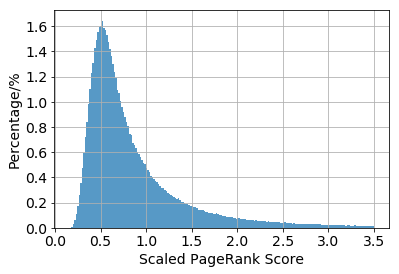

In [18]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = x[np.where(x < 3.5)]
n, bins, patches = plt.hist(x, 200, normed=1, alpha=0.75)
plt.xlabel('Scaled PageRank Score')
plt.ylabel('Percentage/%')
plt.grid(True)
ax = plt.gca()
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
# plt.savefig('ba_%d_%d_hist.pdf' % (num_nodes, m), bbox_inches='tight')
# plt.show()
print len(x) / float(len(scores))
print len(x)